# Simulating the Solow-model

**Author:** Jeppe Druedahl (jeppe.druedahl@econ.ku.dk)

**Description:** This notebook shows how to simulate the canonical Solow-model.

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Solow-model

The basic Solow-equation is:

$$ k_{t+1} - k_t = s k_t^\alpha - \delta k_t $$

In Python this is:

In [2]:
def solow_equation(k,alpha,delta,s):
    saving = s*k**alpha
    depreciation = delta*k
    k_plus = k + saving - depreciation    
    return k_plus

This function simulates the Solow-model for $T$ periods.

In [3]:
def simulate_solow_model(k0,alpha,delta,s,T):
    k_path = [k0]        
    for t in range(1,T):
        k_plus = solow_equation(k_path[t-1],alpha,delta,s)    
        k_path.append(k_plus)
    return k_path

# Example

Choose parameters:

In [4]:
k0 =2
alpha = 0.3
delta = 0.1
s = 0.3
T = 150

Run the simulation:

In [5]:
k_path = simulate_solow_model(k0,alpha,delta,s,T)

Plot the simulation:

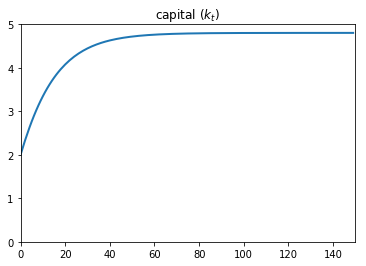

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(k_path[:T],lw=2)
ax.set_title('capital ($k_t$)')
ax.set_xlim([0,T])
ax.set_ylim([0,5]);